<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" /></center>

In [1]:
print("Importing libraries...")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
print("...imported !")

Importing libraries...
...imported !


In [2]:
print("Importing datasets...")
df1 = pd.read_csv('src/uber-raw-data-jul14.csv')
df2 = pd.read_csv('src/uber-raw-data-may14.csv')
df3 = pd.read_csv('src/uber-raw-data-apr14.csv')
df4 = pd.read_csv('src/uber-raw-data-jun14.csv')
df5 = pd.read_csv('src/uber-raw-data-sep14.csv')
df6 = pd.read_csv('src/uber-raw-data-aug14.csv')
print("...imported !")

print()

print("Concatenate datasets...")
#df_location = pd.concat([df2,df3])
df_location = pd.concat([df1,df2,df3,df4,df5,df6])
print("...done!")

Importing datasets...
...imported !

Concatenate datasets...
...done!


In [3]:
df_location.head()

Date/Time      Lat      Lon    Base
0  7/1/2014 0:03:00  40.7586 -73.9706  B02512
1  7/1/2014 0:05:00  40.7605 -73.9994  B02512
2  7/1/2014 0:06:00  40.7320 -73.9999  B02512
3  7/1/2014 0:09:00  40.7635 -73.9793  B02512
4  7/1/2014 0:20:00  40.7204 -74.0047  B02512

In [4]:
df_location['Datetime'] = pd.to_datetime(df_location['Date/Time'], format="%m/%d/%Y %H:%M:%S")
df_location['DayOfWeekNum'] = df_location['Datetime'].dt.dayofweek
df_location['MonthDayNum'] = df_location['Datetime'].dt.day
df_location['Month'] = df_location['Datetime'].dt.month
df_location['Year'] = df_location['Datetime'].dt.year
df_location['HourOfDay'] = df_location['Datetime'].dt.hour

In [5]:
# Taxi zone lookups
taxi = pd.read_csv("src/taxi-zone-lookup.csv")
taxi.head()

LocationID        Borough                     Zone
0           1            EWR           Newark Airport
1           2         Queens              Jamaica Bay
2           3          Bronx  Allerton/Pelham Gardens
3           4      Manhattan            Alphabet City
4           5  Staten Island            Arden Heights

In [6]:
df_location.head()

Date/Time      Lat      Lon    Base            Datetime  \
0  7/1/2014 0:03:00  40.7586 -73.9706  B02512 2014-07-01 00:03:00   
1  7/1/2014 0:05:00  40.7605 -73.9994  B02512 2014-07-01 00:05:00   
2  7/1/2014 0:06:00  40.7320 -73.9999  B02512 2014-07-01 00:06:00   
3  7/1/2014 0:09:00  40.7635 -73.9793  B02512 2014-07-01 00:09:00   
4  7/1/2014 0:20:00  40.7204 -74.0047  B02512 2014-07-01 00:20:00   

   DayOfWeekNum  MonthDayNum  Month  Year  HourOfDay  
0             1            1      7  2014          0  
1             1            1      7  2014          0  
2             1            1      7  2014          0  
3             1            1      7  2014          0  
4             1            1      7  2014          0

In [7]:
df_location.shape

(4534327, 10)

## 1 - Analysis 

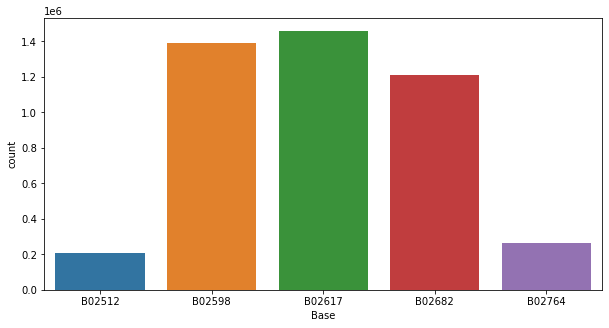

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='Base',data=df_location);

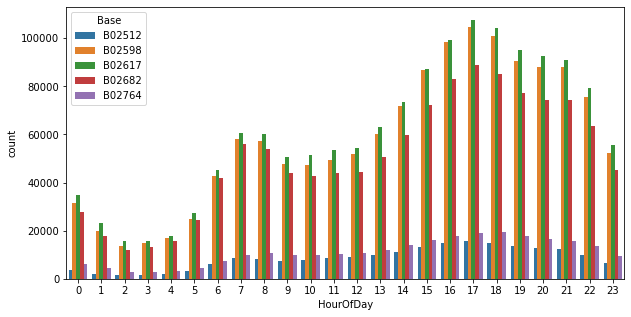

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='HourOfDay',hue="Base",data=df_location);

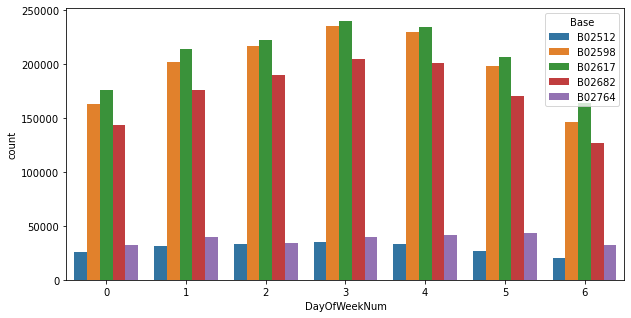

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='DayOfWeekNum',hue="Base",data=df_location);

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

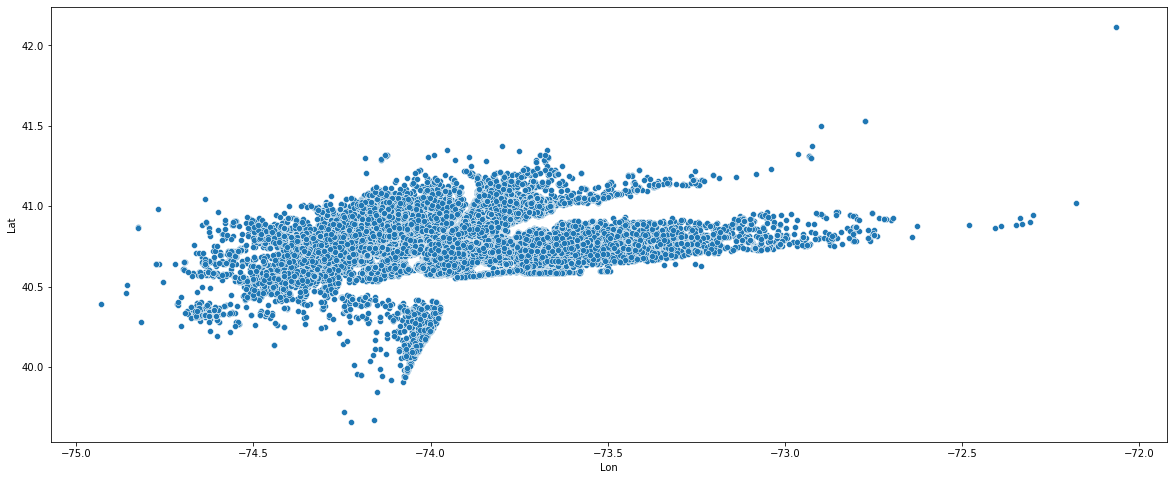

In [11]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df_location,x='Lon',y='Lat')

In [12]:
to_drop = ["Date/Time","MonthDayNum","Month","Year","HourOfDay"]
df_location.drop(columns=to_drop,inplace=True)

## 2 - Clustering pickups

In [13]:
# only consider the long, lat coordinates
X = df_location.iloc[:,0:2]

In [14]:
X.head()

Lat      Lon
0  40.7586 -73.9706
1  40.7605 -73.9994
2  40.7320 -73.9999
3  40.7635 -73.9793
4  40.7204 -74.0047

### 2.1 - KMeans

In [15]:
kmeans = MiniBatchKMeans(4)
kmeans.fit(X)

MiniBatchKMeans(n_clusters=4)

In [16]:
X["Cluster"] = kmeans.labels_
X = X.sample(1000) # to plot quickly

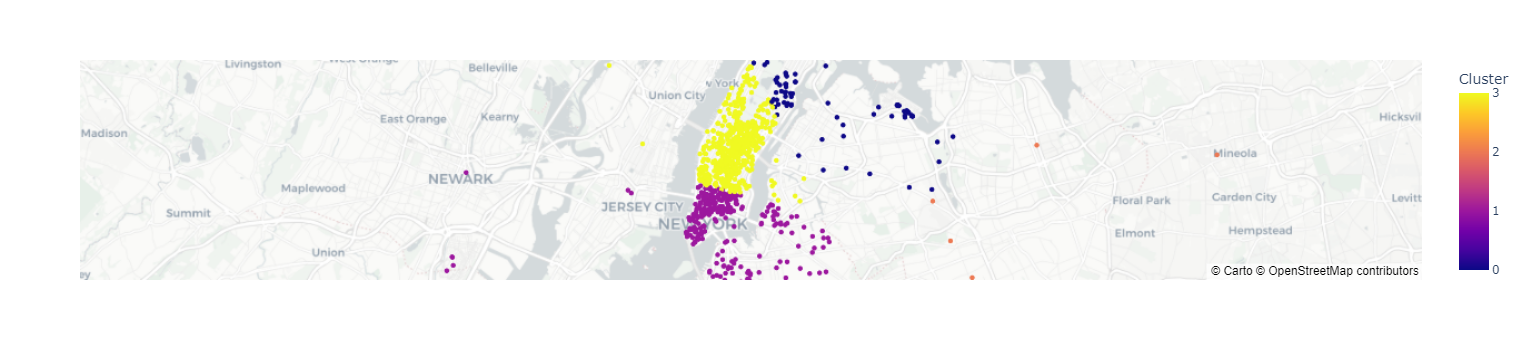

In [17]:
fig = px.scatter_mapbox(X, lat="Lat", lon="Lon", color="Cluster", zoom=10, mapbox_style="carto-positron")
fig.show()

In [18]:
to_drop = ["Datetime","Base"]
df_location.drop(columns=to_drop,inplace=True)

In [19]:
df_location

Lat      Lon  DayOfWeekNum
0       40.7586 -73.9706             1
1       40.7605 -73.9994             1
2       40.7320 -73.9999             1
3       40.7635 -73.9793             1
4       40.7204 -74.0047             1
...         ...      ...           ...
829270  40.7552 -73.9753             6
829271  40.7552 -73.9753             6
829272  40.7617 -73.9788             6
829273  40.7395 -73.9889             6
829274  40.7270 -73.9802             6

[4534327 rows x 3 columns]

In [20]:
# Generalize
X = df_location

In [21]:
X["DayOfWeekNum"].unique()

array([1, 2, 3, 4, 5, 6, 0])

In [22]:
days_of_week = {0:"Monday",
                1:"Tuesday",
                2:"Wednesday",
                3:"Thursday",
                4:"Friday",
                5:"Saturday",
                6:"Sunday"
               }

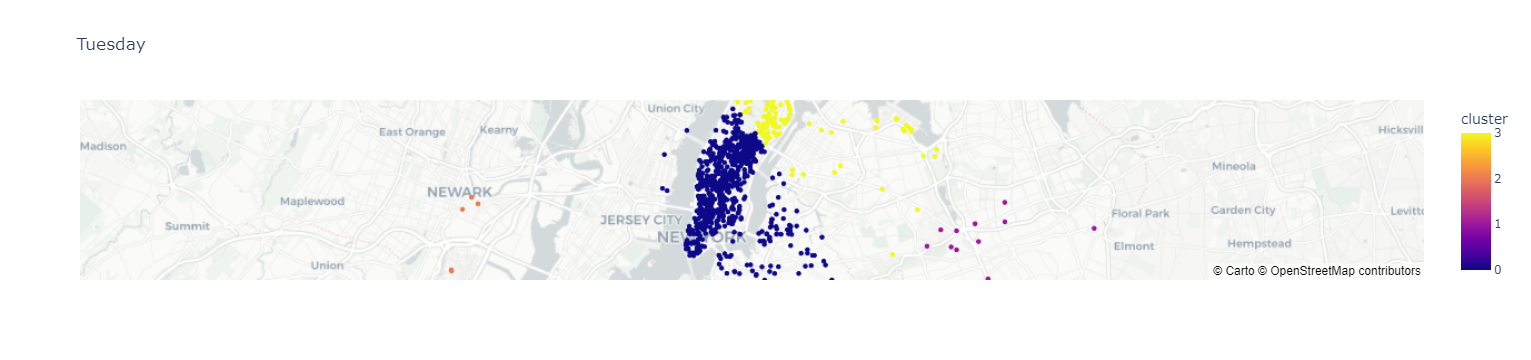

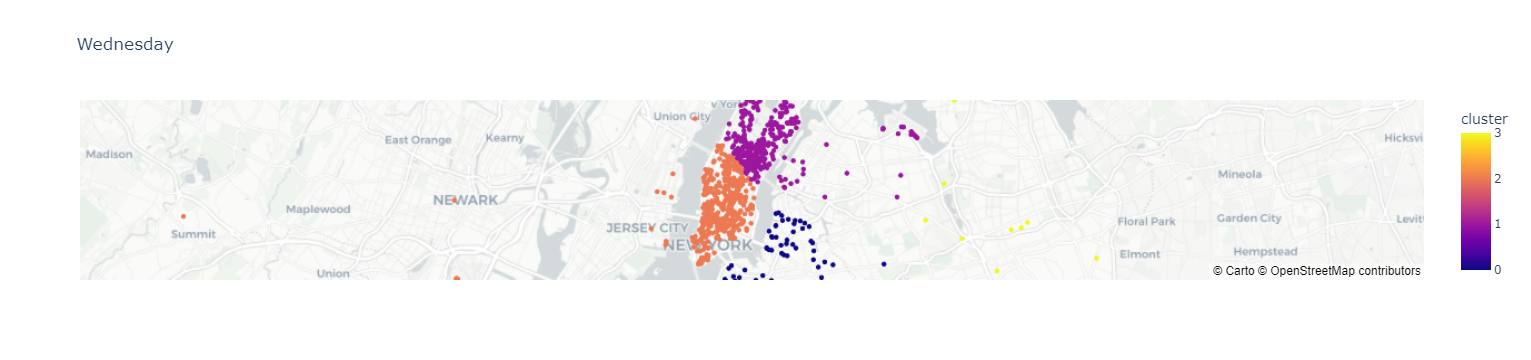

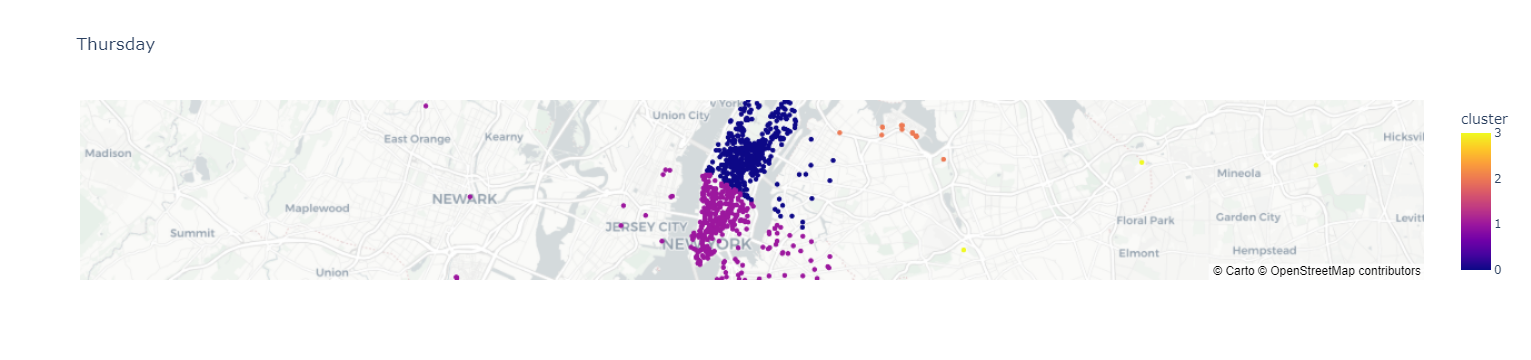

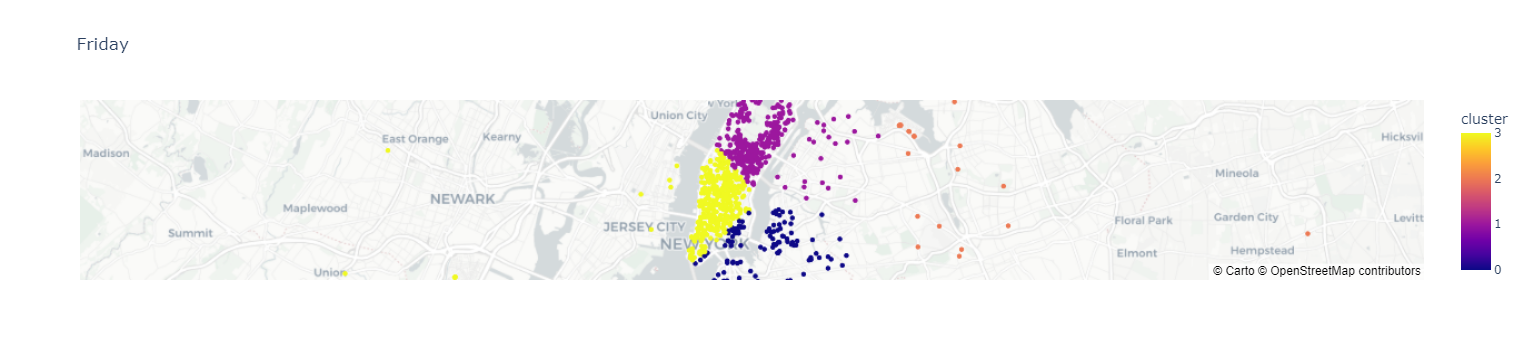

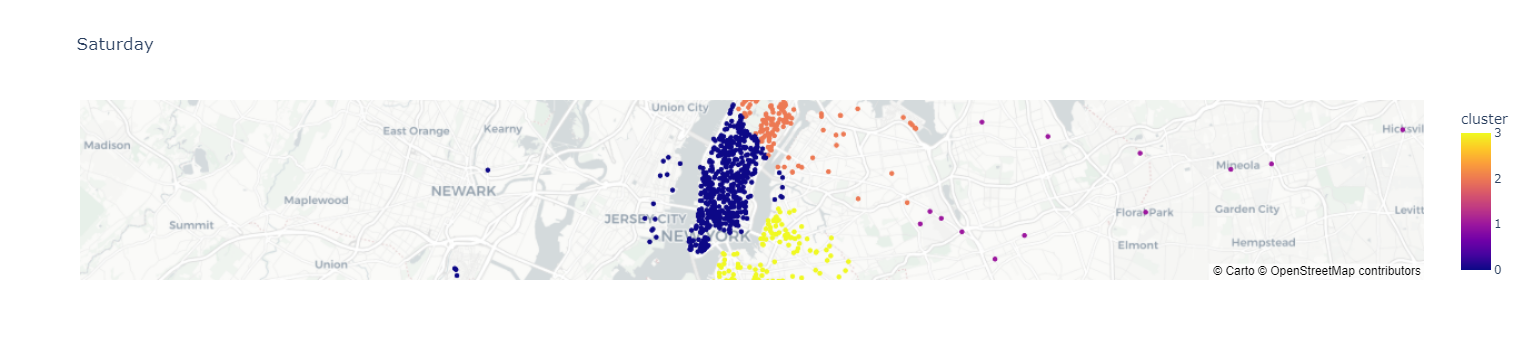

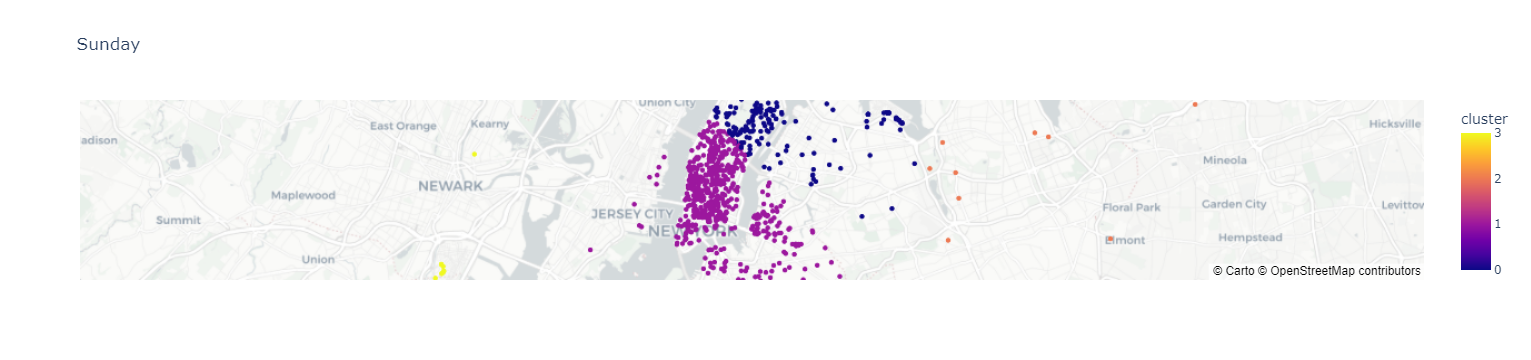

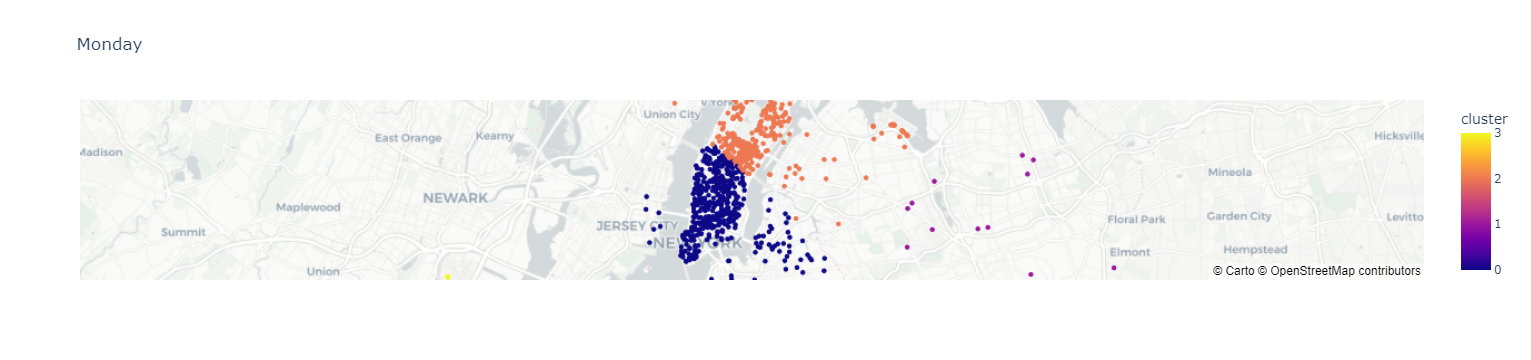

In [23]:
for day in df_location["DayOfWeekNum"].unique():
    
    X = df_location.loc[df_location["DayOfWeekNum"]==day,["Lat","Lon"]]
    kmeans = MiniBatchKMeans(4)
    kmeans.fit(X)

    # Create a sample of data to not have too many elements on the map
    X = X.sample(1000)

    # Predict clusters on sample data
    X.loc[:,'cluster'] = kmeans.predict(X)
    X.head()

    fig = px.scatter_mapbox(X, lat="Lat", lon="Lon", color="cluster", zoom=10, mapbox_style="carto-positron",title=f"{days_of_week[day]}")
    fig.show()

### 2.2 - DBSCAN

In [ ]:
for day in df_location["DayOfWeekNum"].unique():
    
    X = df_location.loc[df_location["DayOfWeekNum"]==day,["Lat","Lon"]]
    dbscan = DBSCAN(eps=0.015, metric = "manhattan")
    dbscan.fit(X)

    # Create a sample of data to not have too many elements on the map
    X = X.sample(1000)

    # Predict clusters on sample data
    X.loc[:,'Cluster'] = dbscan.fit_predict(X)
    X.head()

    fig = px.scatter_mapbox(X, lat="Lat", lon="Lon", color="Cluster", zoom=10, mapbox_style="carto-positron",title=f"{days_of_week[day]}")
    fig.show()

## 3 - Conclusions

- The area which is always with the highest demand is downtown/midtown Manhattan because it is a place that regroups as well companies to work in as touristical venues and local nightlife spots
- The trendy neigborhoods of Brooklyn (particularly in Williamsburgh) stay lively in the afternoon and in the nights, especially on weekends.